# Wiring Resistor Output
### Author: Ayush Pandhi (1003227457)
### Date: October 30, 2018

In [1]:
#Importing required modules
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining the model function
def f(x, a, b):
    return a*x + b

#Loading the data sets
cb1_v = np.loadtxt('Cell Battery Option 1_6.4.txt', skiprows=2, usecols=(0,))
cb1_i = np.loadtxt('Cell Battery Option 1_6.4.txt', skiprows=2, usecols=(1,))

cb2_v = np.loadtxt('Cell Battery Option 2_6.4.txt', skiprows=2, usecols=(0,))
cb2_i = np.loadtxt('Cell Battery Option 2_6.4.txt', skiprows=2, usecols=(1,))

ps1_v_6 = np.loadtxt('DC Power Supply Option 1_ 6.4.txt', skiprows=2, usecols=(0,))
ps1_i_6 = np.loadtxt('DC Power Supply Option 1_ 6.4.txt', skiprows=2, usecols=(1,))

ps1_v_10 = np.loadtxt('DC Power Supply Option 1_10.0.txt', skiprows=2, usecols=(0,))
ps1_i_10 = np.loadtxt('DC Power Supply Option 1_10.0.txt', skiprows=2, usecols=(1,))

ps1_v_15 = np.loadtxt('DC Power Supply Option 1_15.0.txt', skiprows=2, usecols=(0,))
ps1_i_15 = np.loadtxt('DC Power Supply Option 1_15.0.txt', skiprows=2, usecols=(1,))

ps1_v_20 = np.loadtxt('DC Power Supply Option 1_20.0.txt', skiprows=2, usecols=(0,))
ps1_i_20 = np.loadtxt('DC Power Supply Option 1_20.0.txt', skiprows=2, usecols=(1,))

ps2_v_6 = np.loadtxt('DC Power Supply Option 2_6.4.txt', skiprows=2, usecols=(0,))
ps2_i_6 = np.loadtxt('DC Power Supply Option 2_6.4.txt', skiprows=2, usecols=(1,))

ps2_v_10 = np.loadtxt('DC Power Supply Option 2_10.0.txt', skiprows=2, usecols=(0,))
ps2_i_10 = np.loadtxt('DC Power Supply Option 2_10.0.txt', skiprows=2, usecols=(1,))

ps2_v_15 = np.loadtxt('DC Power Supply Option 2_15.0.txt', skiprows=2, usecols=(0,))
ps2_i_15 = np.loadtxt('DC Power Supply Option 2_15.0.txt', skiprows=2, usecols=(1,))

ps2_v_20 = np.loadtxt('DC Power Supply Option 2_20.0.txt', skiprows=2, usecols=(0,))
ps2_i_20 = np.loadtxt('DC Power Supply Option 2_20.0.txt', skiprows=2, usecols=(1,))

In [2]:
#Computing the error on each data set based on provided instrument error
cb1_v_error = np.empty(len(cb1_v))
for i in range(len(cb1_v)):
    cb1_v_error[i] = max(cb1_v[i]*0.0025, 0.01)
    
cb1_i_error = np.empty(len(cb1_i))
for i in range(len(cb1_i)):
    cb1_i_error[i] = max(cb1_i[i]*0.0075, 0.1/1000)
    
cb2_v_error = np.empty(len(cb2_v))
for i in range(len(cb2_v)):
    cb2_v_error[i] = max(cb2_v[i]*0.0025, 0.01)
    
cb2_i_error = np.empty(len(cb2_i))
for i in range(len(cb2_i)):
    cb2_i_error[i] = max(cb2_i[i]*0.0075, 0.1/1000)
    
ps1_v_6_error = np.empty(len(ps1_v_6))
for i in range(len(ps1_v_6)):
    ps1_v_6_error[i] = max(ps1_v_6[i]*0.0025, 0.01)
    
ps1_i_6_error = np.empty(len(ps1_i_6))
for i in range(len(ps1_i_6)):
    ps1_i_6_error[i] = max(ps1_i_6[i]*0.0075, 0.1/1000)
    
ps1_v_10_error = np.empty(len(ps1_v_10))
for i in range(len(ps1_v_10)):
    ps1_v_10_error[i] = max(ps1_v_10[i]*0.0025, 0.01)
    
ps1_i_10_error = np.empty(len(ps1_i_10))
for i in range(len(ps1_i_10)):
    ps1_i_10_error[i] = max(ps1_i_10[i]*0.0075, 0.1/1000)
    
ps1_v_15_error = np.empty(len(ps1_v_15))
for i in range(len(ps1_v_15)):
    ps1_v_15_error[i] = max(ps1_v_15[i]*0.0025, 0.01)
    
ps1_i_15_error = np.empty(len(ps1_i_15))
for i in range(len(ps1_i_15)):
    ps1_i_15_error[i] = max(ps1_i_15[i]*0.0075, 0.1/1000)
    
ps1_v_20_error = np.empty(len(ps1_v_20))
for i in range(len(ps1_v_20)):
    ps1_v_20_error[i] = max(ps1_v_20[i]*0.0025, 0.01)
    
ps1_i_20_error = np.empty(len(ps1_i_20))
for i in range(len(ps1_i_20)):
    ps1_i_20_error[i] = max(ps1_i_20[i]*0.0075, 0.1/1000)
    
ps2_v_6_error = np.empty(len(ps2_v_6))
for i in range(len(ps2_v_6)):
    ps2_v_6_error[i] = max(ps2_v_6[i]*0.0025, 0.01)
    
ps2_i_6_error = np.empty(len(ps2_i_6))
for i in range(len(ps2_i_6)):
    ps2_i_6_error[i] = max(ps2_i_6[i]*0.0075, 0.1/1000)
    
ps2_v_10_error = np.empty(len(ps2_v_10))
for i in range(len(ps2_v_10)):
    ps2_v_10_error[i] = max(ps2_v_10[i]*0.0025, 0.01)
    
ps2_i_10_error = np.empty(len(ps2_i_10))
for i in range(len(ps2_i_10)):
    ps2_i_10_error[i] = max(ps2_i_10[i]*0.0075, 0.1/1000)
    
ps2_v_15_error = np.empty(len(ps2_v_15))
for i in range(len(ps2_v_15)):
    ps2_v_15_error[i] = max(ps2_v_15[i]*0.0025, 0.01)
    
ps2_i_15_error = np.empty(len(ps2_i_15))
for i in range(len(ps2_i_15)):
    ps2_i_15_error[i] = max(ps2_i_15[i]*0.0075, 0.1/1000)
    
ps2_v_20_error = np.empty(len(ps2_v_20))
for i in range(len(ps2_v_20)):
    ps2_v_20_error[i] = max(ps2_v_20[i]*0.0025, 0.01)
    
ps2_i_20_error = np.empty(len(ps2_i_20))
for i in range(len(ps2_i_20)):
    ps2_i_20_error[i] = max(ps2_i_20[i]*0.0075, 0.1/1000)

Estimated Parameters:
[-1.70967220e-03  6.45001389e+00]
[-0.01509227  6.45008809]

Uncertainty in each Parameter:
0.003128102751159738 0.00010161118761338605
0.0031380082354180764 0.00010245374671469518



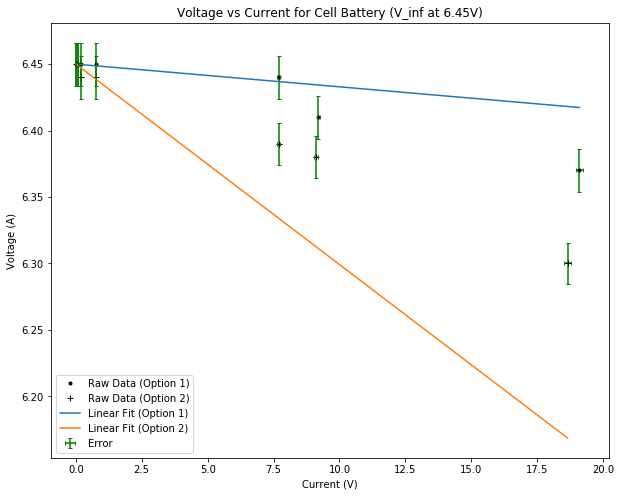

In [3]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, cb1_i, cb1_v, (-1, 6.4), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, cb2_i, cb2_v, (-1, 6.4), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(cb1_i, p_opt1[0], p_opt1[1])
output2 = f(cb2_i, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(cb1_i, cb1_v, 'k.', label='Raw Data (Option 1)')
plt.plot(cb2_i, cb2_v, 'k+', label='Raw Data (Option 2)')
plt.plot(cb1_i, output1, label='Linear Fit (Option 1)')
plt.plot(cb2_i, output2, label='Linear Fit (Option 2)')
plt.errorbar(cb1_i, cb1_v, xerr=cb1_i_error, yerr=cb1_v_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(cb2_i, cb2_v, xerr=cb2_i_error, yerr=cb2_v_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (V)')
plt.ylabel('Voltage (A)')
plt.title('Voltage vs Current for Cell Battery (V_inf at 6.45V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-5.84775262e-04  6.45000477e+00]
[-1.51054431e-03  6.41001367e+00]

Uncertainty in each Parameter:
0.0030644295890814763 0.00010152906263594486
0.003142501931502356 0.00010243351280384244



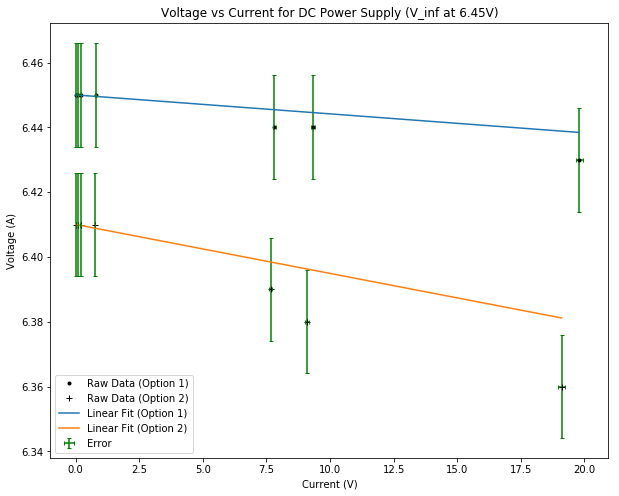

In [4]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_6, ps1_v_6, (-1, 6.4), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_6, ps2_v_6, (-1, 6.4), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_6, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_6, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_6, ps1_v_6, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_6, ps2_v_6, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_6, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_6, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_6, ps1_v_6, xerr=ps1_i_6_error, yerr=ps1_v_6_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_6, ps2_v_6, xerr=ps2_i_6_error, yerr=ps2_v_6_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('Current (V)')
plt.ylabel('Voltage (A)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 6.45V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-3.91484052e-04  1.00500050e+01]
[-2.95003039e-03  1.01100381e+01]

Uncertainty in each Parameter:
0.0020384399082842156 0.00010172526485465467
0.0019764090957051753 0.00010214488669053141



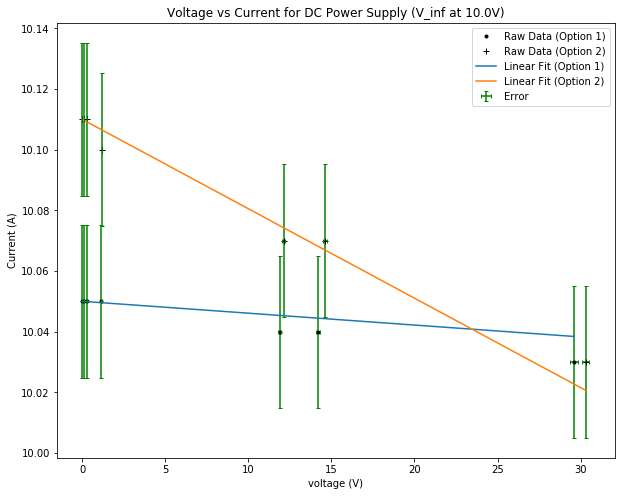

In [5]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_10, ps1_v_10, (-1, 10), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_10, ps2_v_10, (-1, 10), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_10, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_10, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_10, ps1_v_10, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_10, ps2_v_10, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_10, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_10, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_10, ps1_v_10, xerr=ps1_i_10_error, yerr=ps1_v_10_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_10, ps2_v_10, xerr=ps2_i_10_error, yerr=ps2_v_10_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 10.0V)')
plt.legend()
plt.show()

Estimated Parameters:
[-6.27379304e-04  1.50100127e+01]
[-1.27645684e-03  1.49700271e+01]

Uncertainty in each Parameter:
0.001321182907365932 0.00010196015910493647
0.0013262478266379545 0.00010236057937192206



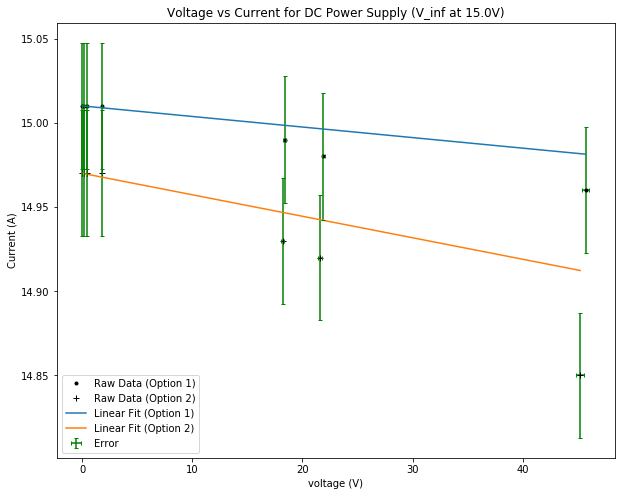

In [6]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_15, ps1_v_15, (-1, 15), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_15, ps2_v_15, (-1, 15), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_15, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_15, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_15, ps1_v_15, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_15, ps2_v_15, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_15, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_15, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_15, ps1_v_15, xerr=ps1_i_15_error, yerr=ps1_v_15_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_15, ps2_v_15, xerr=ps2_i_15_error, yerr=ps2_v_15_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 15.0V)')
plt.legend(loc='lower left')
plt.show()

Estimated Parameters:
[-5.25977712e-04  1.98600141e+01]
[-1.31460493e-03  1.98000376e+01]

Uncertainty in each Parameter:
0.000985912858487377 0.00010181624867094377
0.000992990079434665 0.00010244607262853158



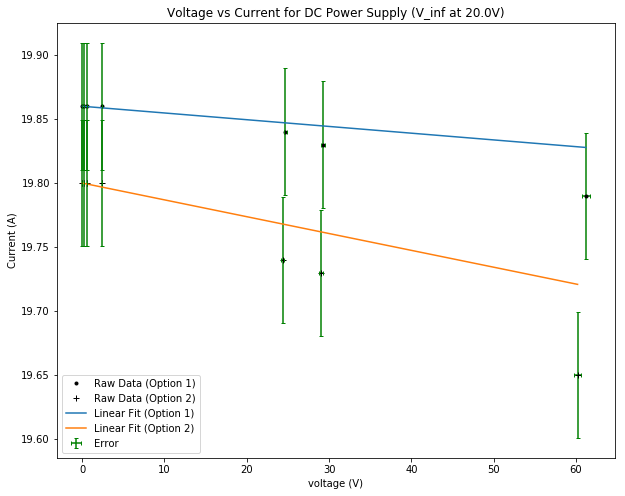

In [7]:
#Calling curve_fit() for these data sets 
p_opt1, p_cov1 = curve_fit(f, ps1_i_20, ps1_v_20, (-1, 20), cb1_i_error, True)
p_opt2, p_cov2 = curve_fit(f, ps2_i_20, ps2_v_20, (-1, 20), cb2_i_error, True)
print('Estimated Parameters:')
print(p_opt1)
print(p_opt2)
print()
print('Uncertainty in each Parameter:')
print(p_cov1[0,0]**0.5, p_cov1[1,1]**0.5)
print(p_cov2[0,0]**0.5, p_cov2[1,1]**0.5)
print()

#Outputs based on the model function
output1 = f(ps1_i_20, p_opt1[0], p_opt1[1])
output2 = f(ps2_i_20, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(ps1_i_20, ps1_v_20, 'k.', label='Raw Data (Option 1)')
plt.plot(ps2_i_20, ps2_v_20, 'k+', label='Raw Data (Option 2)')
plt.plot(ps1_i_20, output1, label='Linear Fit (Option 1)')
plt.plot(ps2_i_20, output2, label='Linear Fit (Option 2)')
plt.errorbar(ps1_i_20, ps1_v_20, xerr=ps1_i_20_error, yerr=ps1_v_20_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.errorbar(ps2_i_20, ps2_v_20, xerr=ps2_i_20_error, yerr=ps2_v_20_error, linestyle='none', ecolor='g', capsize=2)
plt.xlabel('voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage vs Current for DC Power Supply (V_inf at 20.0V)')
plt.legend(loc='lower left')
plt.show()